<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from random import shuffle
from scipy import stats

In [ ]:
data = pd.read_excel("/content/Load Data in kW.xlsx")
data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [ ]:
data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


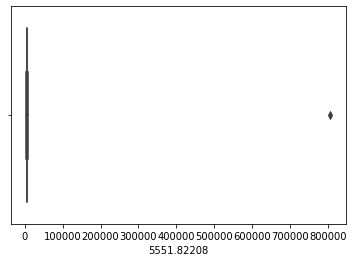

In [ ]:
sns.boxplot(data.iloc[:,0])

In [ ]:
z = np.abs(stats.zscore(data))
print(z)

[[0.08229398]
 [0.08782374]
 [0.07705526]
 ...
 [0.09743715]
 [0.07254415]
 [0.03178457]]


{'boxes': [<matplotlib.lines.Line2D at 0x7f3118642390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f311864b6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f31185d6110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f31185d6790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3118642f50>,
  <matplotlib.lines.Line2D at 0x7f311864b690>]}

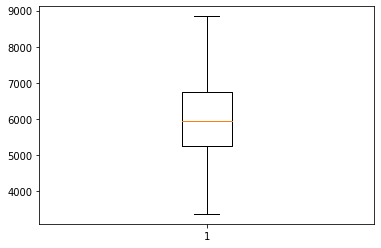

In [ ]:
data.iloc[928,0] = data.iloc[927,0]
plt.boxplot(data.iloc[:,0])

In [ ]:
x = []
y = []
for i in range(len(data.iloc[:,0])-24):
  x.append(data.iloc[i,0])
  y.append(data.iloc[i+24,0])

In [ ]:
x = minmax_scale(x)
y = minmax_scale(y)
data_n= []
for i in range(len(x)):
  data_n.append((x[i],y[i]))
print(len(data_n))
train_data_n,test_data_n = train_test_split(data_n,test_size=0.1)
len(train_data_n)

2159


1943

In [47]:
m = 1
c = 1
learning_rate = 0.01
epochs = 10
momentum_coefficient= 0.8
batch_size = 300
v_m = 0
v_c = 0
def gradient_of_m(d,m,c,v_m,v_c,momentum_coefficient):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coefficient*v_m)*d[i][0]-(c+momentum_coefficient*v_c))*d[i][0]
  return -1*sum/len(d)
def gradient_of_c(d,m,c,v_m,v_c,momentum_coefficient):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coefficient*v_m)*d[i][0]-(c+momentum_coefficient*v_c))
  return -1*sum/len(d)
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

In [48]:
error_list = []
number_of_batches = (len(train_data_n)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = train_data_n[j*batch_size:]
    else:
      d = train_data_n[j*batch_size:(j+1)*batch_size]
    delta_m = -1*learning_rate*gradient_of_m(d,m,c,v_m,v_c,momentum_coefficient)
    delta_c = -1*learning_rate*gradient_of_c(d,m,c,v_m,v_c,momentum_coefficient)
    v_m = v_m*momentum_coefficient + delta_m
    v_c = v_c*momentum_coefficient + delta_c
    m = m + v_m
    c = c + v_c
    print(" error {}".format(error(d,m,c)))
    error_list.append(error(d,m,c))
random.shuffle(train_data_n)

 error 0.49344723914062694
 error 0.47622329326986884
 error 0.4450437790246221
 error 0.4171834381664133
 error 0.3780414805696942
 error 0.34918122597384005
 error 0.3277395676846733
 error 0.27448265856894505
 error 0.24830143185086884
 error 0.21794978597020465
 error 0.19225697441944403
 error 0.16718016727757243
 error 0.14921242651581532
 error 0.1384058216477334
 error 0.10731566271413516
 error 0.09677287083864927
 error 0.08347105502513469
 error 0.07129276164019166
 error 0.06243388106443884
 error 0.055680996311913436
 error 0.05374714780544321
 error 0.03833573518364386
 error 0.03604901509410655
 error 0.03175331581218719
 error 0.02661546519179382
 error 0.02503613397819023
 error 0.022806537006857638
 error 0.024043378220157046
 error 0.016089010384542593
 error 0.016293773291349484
 error 0.015323331417069668
 error 0.012825146895019372
 error 0.013741481535868714
 error 0.012774186613282192
 error 0.014686883656564434
 error 0.00996339235000725
 error 0.01056876145563

Text(0.5, 1.0, 'error graph')

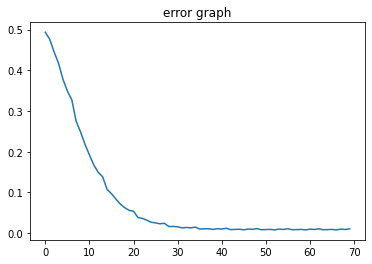

In [49]:
x_1 = range(len(error_list))
y_1 = error_list
plt.plot(x_1,y_1)
plt.title("error graph")

In [51]:
print("train error :",error(train_data_n,m,c))
print("test error :",error(test_data_n,m,c))
print(m,c)

train error : 0.008814936453636936
test error : 0.009848932336067474
0.611845462867108 0.1908347838688542


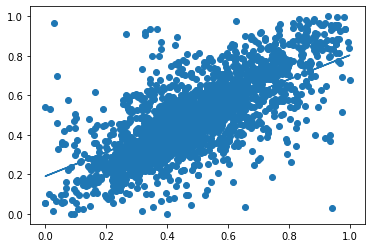

In [52]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [53]:
input_load = float(input("enter yesterday load at this time : "))
maximum_value = 8841.669480
minimum_value = 3377.919600
input_load = (input_load - minimum_value)/(maximum_value-minimum_value)
output_load = input_load*m+c
output_load = output_load*(maximum_value-minimum_value)+minimum_value
print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 5555.5
predicted load for this hour is :  5752.93581523162
